The SEIR model was used, with compartment S, E, I, R stand for susceptible, exposed, infected, and recovered or removed respectively. The model describing the status of each compartment is shown in the following differential equations.

$$
\begin{aligned}
&\frac{d S(t)}{d t} = -\frac{\beta S(t) I(t)}{N}\\
&\frac{d E(t)}{d t} = \frac{\beta S(t) I(t)}{N}-\delta E(t)\\
&\frac{d I(t)}{d t} = \delta E(t)-v I(t)\\
&\frac{d R(t)}{d t} = v I(t)
\end{aligned}
$$

Where β is force of infection, or disease transmission rate, δ is inverse of latent period (days), ν is inverse of infectious period (days), or removal rate and N is a population size of the community.

A Simulation on Potential Secondary Spread of Novel Coronavirus in an Exported Country Using a Stochastic Epidemic SEIR Model
https://www.preprints.org/manuscript/202002.0179/v1

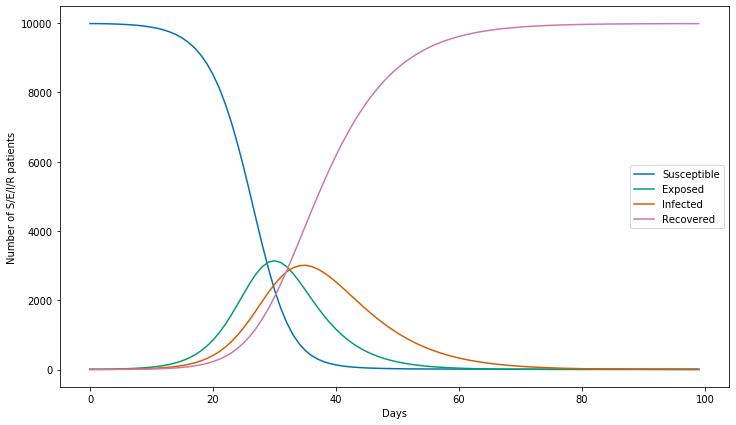

In [1]:
#import packages
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
plt.style.use('seaborn-colorblind')
%matplotlib inline
%load_ext autotime

#parameters
N = 10000 #community size
E0 = 10 #init Exposed patients
beta = 0.0001 #infection force
lp = 5.5 #latent period(days)
ip = 7 #indectious period(days)

#differential equation: SEIR model
def seir(v, t):
    dS = -beta*v[0]*v[2]
    dE = beta*v[0]*v[2] - (1/lp)*v[1]
    dI = (1/lp)*v[1] - (1/ip)*v[2]
    dR = (1/ip)*v[2]
    return np.array([dS, dE, dI, dR])

#solve SEIR model
              #S #E #I #R 
ini_state = [N-E0, E0, 0, 0]
t_max = 100
tspan = np.linspace(0.0, t_max, t_max)
rcParams['figure.figsize'] = 12, 7
plt.plot(odeint(seir, ini_state, tspan))
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.xlabel('Days')
plt.ylabel('Number of S/E/I/R patients')
plt.show()

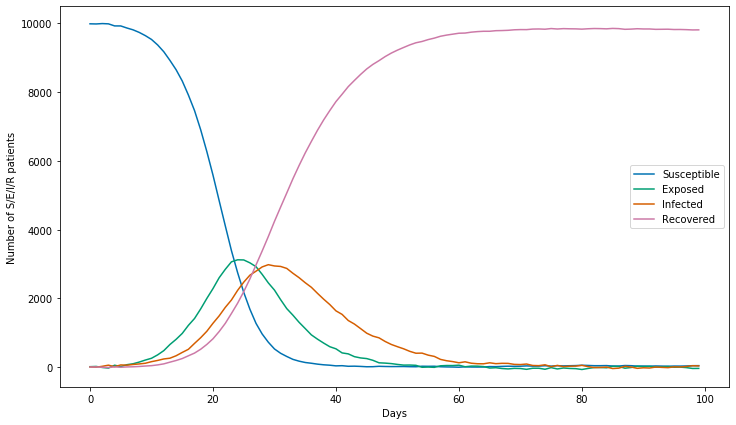

time: 421 ms


In [2]:
import sdeint

#stochastic SEIR model
#Random force
def G(v, t):
    cor = np.array([[1, -1.5], [-3, 5], [3, -5], [-1, 1.5]])
    return np.cov(cor, rowvar=1, bias=1) 

rcParams['figure.figsize'] = 12, 7
plt.plot(sdeint.itoint(seir, G, ini_state, tspan))
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.xlabel('Days')
plt.ylabel('Number of S/E/I/R patients')
plt.show()